Nama: Samatha Marhaendra Putra

NIM : 19/444071/TK/49267 

Asal Universitas : Universitas Gadjah Mada

Tanggal Mulai Pengerjaan : 13 November 2020

Sumber Dataset : IMDB Indonesian Movies Dataset (link: https://www.kaggle.com/dionisiusdh/imdb-indonesian-movies)

# *Import Libraries*

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# *Data Importing*

In [67]:
df = pd.read_csv('D:/DSC ITB/Dataset/indonesian_movies.csv')
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
title           1272 non-null object
year            1272 non-null int64
description     840 non-null object
genre           1236 non-null object
rating          376 non-null object
users_rating    1272 non-null float64
votes           1272 non-null object
languages       1272 non-null object
directors       1265 non-null object
actors          1272 non-null object
runtime         869 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


In [69]:
## melihat jumlah dan elemen unik pada kolom 'rating'
print(df['rating'].nunique(), 'unique ratings')
print(df['rating'].unique())

11 unique ratings
['13+' '17+' nan 'SU' 'TV-14' '21+' 'TV-MA' 'Not Rated' 'R' 'D' 'PG-13'
 'Unrated']


# *Data Cleaning*

### menghapus data dengan value NaN pada kolom yang dipilih
### menghapus kolom yang dipilih
### me-reset indeks

In [70]:
## menghapus data yang memiliki value NaN pada kolom yang dipilih
df = df.dropna(subset=['genre', 'rating', 'directors', 'actors', 'runtime'])

## menghapus kolom tertentu
df = df.drop(['description', 'actors'], axis=1)

## me-reset indeks
df = df.reset_index(drop=True)


df

,title,year,genre,rating,users_rating,votes,languages,directors,runtime
0,#FriendButMarried 2,2020,Biography,13+,6.5,120,Indonesian,Rako Prijanto,100 min
1,4 Mantan,2020,Thriller,17+,6.4,8,Indonesian,Hanny Saputra,80 min
2,Aku Tahu Kapan Kamu Mati,2020,Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,92 min
3,Anak Garuda,2020,Adventure,13+,9.1,27,Indonesian,Faozan Rizal,129 min
4,Dignitate,2020,Drama,17+,7.6,33,Indonesian,Fajar Nugros,109 min
...,...,...,...,...,...,...,...,...,...
295,Escape from Hellhole,1983,Action,Not Rated,4.4,91,Indonesian,Maman Firmansyah,100 min
296,Ferocious Female Freedom Fighters,1982,Action,R,5.0,210,Indonesian,Jopi Burnama,74 min
297,Pengabdi Setan,1982,Horror,R,5.6,378,Indonesian,Sisworo Gautama Putra,96 min
298,Steel-Fisted Dragon,1981,Action,R,5.3,24,Indonesian,Iksan Lahardi,78 min


### memanipulasi data pada kolom 'votes'

In [71]:
df["votes"] = df["votes"].apply(lambda x: x.replace(",", "."))
df["votes"] = df["votes"].astype(float)

### memanipulasi data pada kolom 'runtime'

In [72]:
df["runtime"] = df["runtime"].apply(lambda x: x.replace(" min", ""))
df["runtime"] = df["runtime"].astype(int)

### menampilkan elemen unik pada kolom 'rating'

In [73]:
print('Jenis Rating')
print(df['rating'].unique())

Jenis Rating
['13+' '17+' 'SU' 'TV-14' 'TV-MA' 'Not Rated' '21+' 'R' 'D']


### memanipulasi data pada kolom 'rating', lalu menampilkan jumlah dan elemen uniknya

In [74]:
df["rating"]= df["rating"].replace({
    "R" : "13+",
    "TV-14" : "13+",
    "TV-MA" : "13+",
    "D" : "17+"
})

print('Ada sebanyak', df['rating'].nunique(), 'Jenis Rating')
print(df['rating'].unique())

Ada sebanyak 5 Jenis Rating
['13+' '17+' 'SU' 'Not Rated' '21+']


# *Data Exploration*

## melihat ringkasan dari data yang dimiliki

In [75]:
df.describe(include="all")

,title,year,genre,rating,users_rating,votes,languages,directors,runtime
count,300,300.000000,300,300,300.000000,300.000000,300,300,300.000000
unique,300,NaN,11,5,NaN,NaN,5,143,NaN
top,Susi Susanti: Love All,NaN,Drama,13+,NaN,NaN,Indonesian,Rizal Mantovani,NaN
freq,1,NaN,97,164,NaN,NaN,288,12,NaN
mean,NaN,2015.850000,NaN,NaN,6.308333,123.654650,NaN,NaN,98.930000
std,NaN,6.566422,NaN,NaN,1.436143,180.743284,NaN,NaN,14.667272
min,NaN,1980.000000,NaN,NaN,1.200000,1.004000,NaN,NaN,68.000000
25%,NaN,2016.000000,NaN,NaN,5.575000,17.000000,NaN,NaN,90.000000
50%,NaN,2018.000000,NaN,NaN,6.600000,46.000000,NaN,NaN,97.000000
75%,NaN,2019.000000,NaN,NaN,7.300000,141.500000,NaN,NaN,106.000000


Dari sini terlihat bahwa pada dataset yang ada, film yang ada rata-rata dirilis pada tahun 2015, dengan film terlama dirilis pada tahun 1980 dan film terbaru dirilis pada tahun 2020.

## melihat peringkat 5 teratas film berdasarkan *genre*

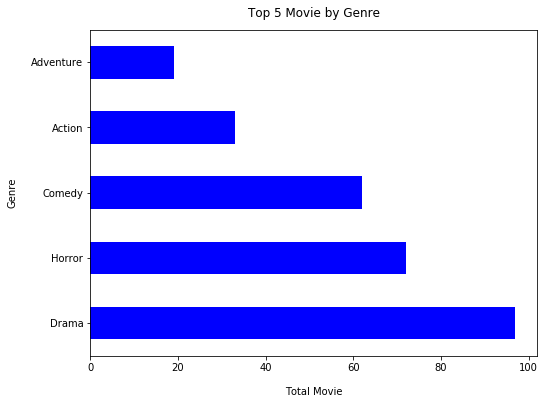

In [76]:
df['genre'].value_counts().head(5).plot(kind='barh', figsize=(8, 6), color='blue')
plt.xlabel("Total Movie", labelpad=14)
plt.ylabel("Genre", labelpad=14)
plt.title("Top 5 Movie by Genre", y=1.02);

In [77]:
df.genre.value_counts()

Drama        97
Horror       72
Comedy       62
Action       33
Adventure    19
Biography     8
Crime         4
Thriller      2
Animation     1
History       1
Romance       1
Name: genre, dtype: int64

## melihat jumlah setiap jenis film berdasarkan *rating*

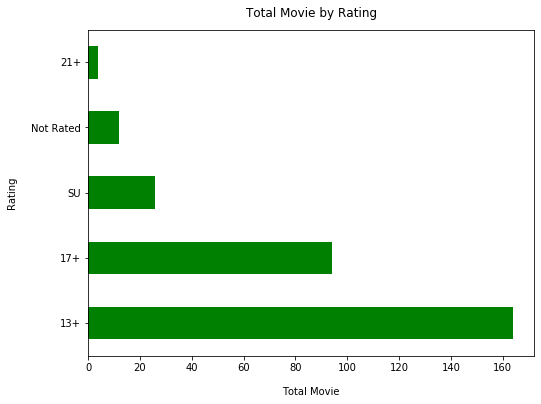

In [78]:
df['rating'].value_counts().plot(kind='barh', figsize=(8, 6), color='green')
plt.xlabel("Total Movie", labelpad=14)
plt.ylabel("Rating", labelpad=14)
plt.title("Total Movie by Rating", y=1.02);

In [79]:
df.rating.value_counts()

13+          164
17+           94
SU            26
Not Rated     12
21+            4
Name: rating, dtype: int64

## melihat jumlah setiap jenis film berdasarkan bahasa yang digunakan

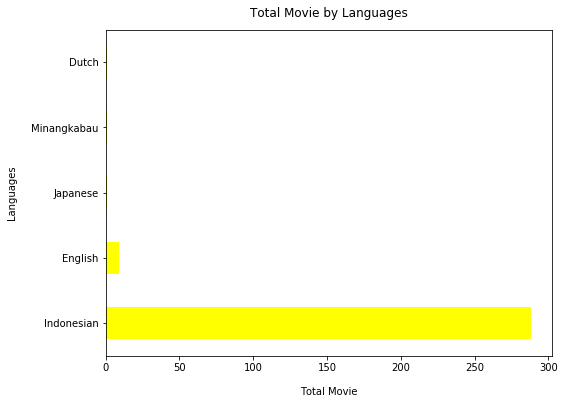

In [80]:
df['languages'].value_counts().plot(kind='barh', figsize=(8, 6), color='yellow')
plt.xlabel("Total Movie", labelpad=14)
plt.ylabel("Languages", labelpad=14)
plt.title("Total Movie by Languages", y=1.02);

In [81]:
df.languages.value_counts()

Indonesian     288
English          9
Japanese         1
Minangkabau      1
Dutch            1
Name: languages, dtype: int64

## melihat peringkat 5 teratas *directors* berdasarkan jumlah *movies directed*

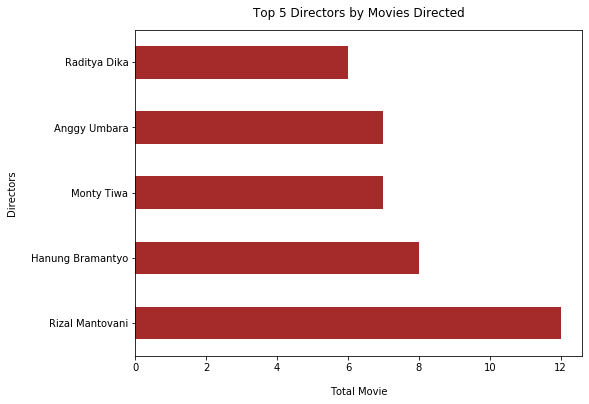

In [82]:
df['directors'].value_counts().head(5).plot(kind='barh', figsize=(8, 6), color='brown')
plt.xlabel("Total Movie", labelpad=14)
plt.ylabel("Directors", labelpad=14)
plt.title("Top 5 Directors by Movies Directed", y=1.02);

In [83]:
df.directors.value_counts().head(5)

Rizal Mantovani     12
Hanung Bramantyo     8
Monty Tiwa           7
Anggy Umbara         7
Raditya Dika         6
Name: directors, dtype: int64

## melihat distribusi film berdasarkan tahun rilisnya

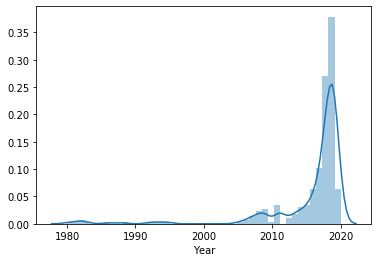

In [84]:
sns.distplot(df['year'])
plt.xlabel('Year')
plt.show()
pass

Grafik di atas menunjukkan bahwa distribusi film berdasarkan tahun rilisnya cenderung lebih banyak pada tahun 2010 ke atas.

## melihat distribusi film berdasarkan *Users Rating*

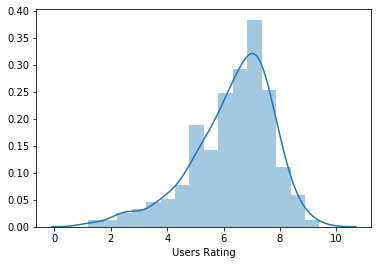

In [85]:
sns.distplot(df['users_rating'])
plt.xlabel('Users Rating')
plt.show()
pass

Grafik di atas menunjukkan bahwa distribusi film berdasarkan users_rating cenderung pada kisaran angka 6-8.

## melihat distribusi film berdasarkan jumlah *votes*

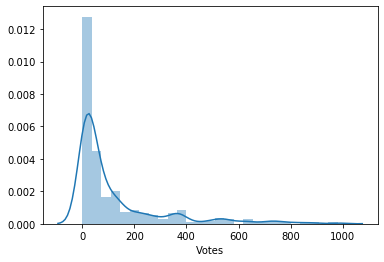

In [86]:
sns.distplot(df['votes'])
plt.xlabel('Votes')
plt.show()
pass

Grafik di atas menunjukkan bahwa distribusi film berdasarkan votes/pemilihnya cenderung pada kisaran angka 0-200, tetapi ada film yang jumlah votesnya cukup banyak, hingga menyentuh angka 800an.

## melihat distribusi film berdasarkan durasinya

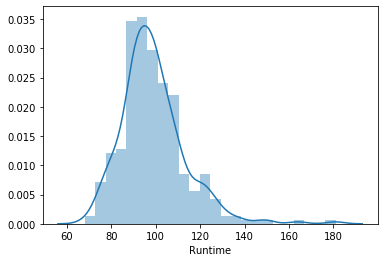

In [87]:
sns.distplot(df['runtime'])
plt.xlabel('Runtime')
plt.show()
pass

Grafik di atas menunjukkan bahwa distribusi film berdasarkan runtime/durasinya cenderung dalam rentang 80-120 menit.

## melihat korelasi antar variabel dalam angka

In [88]:
df.corr()

,year,users_rating,votes,runtime
year,1.000000,0.212428,-0.067695,0.101081
users_rating,0.212428,1.000000,0.019193,0.321976
votes,-0.067695,0.019193,1.000000,0.245260
runtime,0.101081,0.321976,0.245260,1.000000


## melihat korelasi antar variabel dalam bentuk *heatmap*

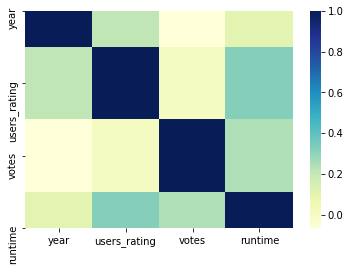

In [89]:
sns.heatmap(df.corr(), cmap="YlGnBu")

Dari heatmap di atas, dapat dilihat bahwa semakin gelap warna suatu kotak menunjukkan semakin tingginya tingkat korelasi. Akan tetapi, pada data yang dimiliki, baik pada kolom year, users_rating, votes, maupun runtime tidak ada satupun yang berkorelasi positif. Korelasi paling kuat (meskipun belum cukup kuat untuk disebut berkorelasi positif) di antara korelasi yang lain adalah korelasi antara runtime/durasi suatu film dan users rating, dengan tingkat korelasi sebesar 0.321976. 